# Caso práctico Video Game Sales

Descargar dataset de Kaggle: https://www.kaggle.com/gregorut/videogamesales

Importante: usar el dataset CSV proporcionado para este ejercicio ya que contiene valores nulos creados para el apartado de valores faltantes.

## Importar librerías

Importar pandas

In [107]:
import pandas as pd
import numpy as np

## Carga de datos CSV

In [108]:
df = pd.read_csv('../data/vgsales_caso_practico.csv')

## Inspección de los datos

Verifica los primeros registros del conjunto de datos y obtén un resumen de las estadísticas generales.


In [109]:
df.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [110]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16596.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.535448
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.537945
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Tratamiento de valores faltantes

Verifica si hay valores faltantes y, si es necesario, realiza el tratamiento adecuado para cada caso.


In [111]:
data = pd.Series([1, None, 3, 4, None])
data.isnull

<bound method Series.isnull of 0    1.0
1    NaN
2    3.0
3    4.0
4    NaN
dtype: float64>

## Estadísticas de agrupación

Agrupa los datos por la columna 'Platform' y calcula las ventas totales para cada plataforma.


In [112]:
df.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [113]:
ventas_totales = df.groupby('Platform').sum()
print(ventas_totales)

              Rank       Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Platform                                                                   
2600        585665   229928.0     90.60      5.47      0.00         0.91   
3DO          43118     5984.0      0.00      0.00      0.10         0.00   
3DS        4662644  1006531.0     78.87     58.52     97.35        12.63   
DC          456114   103997.0      5.43      1.69      8.56         0.27   
DS        20845831  4283493.0    390.71    194.65    175.57        60.53   
GB          332419   193608.0    114.32     47.82     85.12         8.20   
GBA        7136749  1624604.0    187.54     75.25     47.33         7.73   
GC         4817401  1085843.0    133.46     38.71     21.58         5.18   
GEN         190019    53812.0     19.27      5.52      2.67         0.89   
GG           13527     1992.0      0.00      0.00      0.04         0.00   
N64        2083189   631536.0    139.02     41.06     34.22         4.38   
NES         

C:\Users\Malala Severien\AppData\Local\Temp\ipykernel_16492\1779111725.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ventas_totales = df.groupby('Platform').sum()


## Visualización de datos

Crea un gráfico de barras para mostrar las ventas globales por plataforma.


In [114]:
df.sort_values('Platform', ascending=False).head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15052,15055,NASCAR Heat Evolution,XOne,2016.0,Racing,Dusenberry Martin Racing,0.02,0.0,0.0,0.0,0.02


<Axes: >

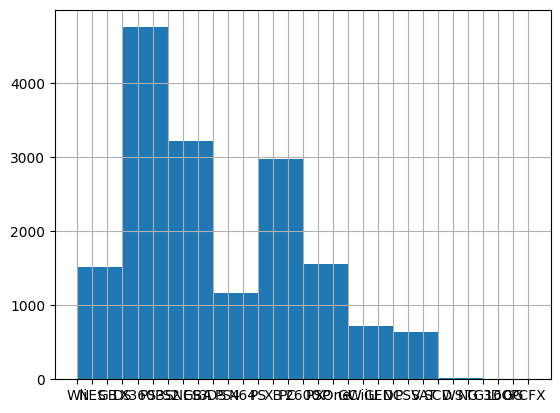

In [115]:
ventas_platforms = df['Platform'].hist()
ventas_platforms

In [116]:
# df_barras = df.sort_values('Global_Sales', ascending=False).iloc[:10]

# df_barras.plot(kind='bar', x='District', y='Population', rot=45)

## Creación de nuevas características

Crea una nueva característica 'Sales_in_Millions' para hacer que las ventas sean más legibles, que muestre las ventas totales pero en millones.

In [117]:
df_crear=pd.read_csv('../data/vgsales_caso_practico.csv', dtype={'Sales_in_Millions': 'float'})
df_crear.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

## Agrupación avanzada:

Agrupa por 'Year' y 'Platform' y calcula las ventas totales.

In [118]:
df.groupby('Platform')['Year'].sum()

Platform
2600     229928.0
3DO        5984.0
3DS     1006531.0
DC       103997.0
DS      4283493.0
GB       193608.0
GBA     1624604.0
GC      1085843.0
GEN       53812.0
GG         1992.0
N64      631536.0
NES      194741.0
NG        23934.0
PC      1894273.0
PCFX       1996.0
PS      2375627.0
PS2     4263750.0
PS3     2622109.0
PS4      677042.0
PSP     2404440.0
PSV      829782.0
SAT      345313.0
SCD       11963.0
SNES     476529.0
TG16       3990.0
WS        12000.0
Wii     2591562.0
WiiU     287944.0
X360    2482205.0
XB      1608920.0
XOne     429150.0
Name: Year, dtype: float64

In [123]:
df = pd.groupby['Year'].sum() + ['Platform'].sum()
print('Las ventas totales son:', df)



AttributeError: module 'pandas' has no attribute 'groupby'

## Tratamiento de columnas de texto

Transforma el género en una variable categórica numerada.


## Correlación entre características

Examina la correlación entre las ventas en diferentes regiones utilizando la función corr() de pandas.

## Operaciones con strings

Crea una nueva característica que contenga la primera letra del nombre del juego

## Recuento

Cuenta cuántos juegos comienzan con cada letra.


## Ordenación de datos

Ordena el DataFrame por ventas globales en orden descendente.

## Reset de índice

Si en algún momento hemos filtrado el DataFrame o lo hemos alterado de manera que el índice ya no es una secuencia continua de enteros, puede ser útil restablecer el índice.


## Eliminación de columnas innecesarias

Podemos eliminar columnas que no necesitaremos para futuros análisis. Por ejemplo, podemos eliminar la columna 'Rank'.


## Identificación de Outliers

Podemos usar el método del rango intercuartil (IQR) para detectar outliers en la columna 'Global_Sales'.

Elimina los outliers u obtén un dataframe sin outliers en la columna GlobalSales.

## Uso de apply para operaciones de columna

Supongamos que queremos crear una nueva columna que sea GlobalSales pero con el IVA añadido, por ejemplo global_sales_iva

## Uso de iloc para seleccionar datos

iloc es útil para seleccionar filas y columnas por posición. Por ejemplo, si queremos seleccionar las primeras 5 filas y las primeras 3 columnas.


## Guardar DataFrame

Finalmente, guardamos el DataFrame con todas las nuevas características y transformaciones en un nuevo archivo CSV.
